### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("..")
import helper as hp

In [3]:
df = pd.read_excel("/Users/michaelmoret/Desktop/Externa/data/pulling/27-02-25/20240227_tensile_WAX4_pH_50strands/modified.xlsx")
df.head(6)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,MPa/%,g,mm,kg/mm².%,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,Area St-Strain 1:3,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Start Batch 20240227_5.0_NC_,20240227_5.0_NC_,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20240227_5.0_NC_1,20240227_5.0_NC_,50.692,108.939,-27.123,1334.504,63.0,64.0,ok
5,20240227_5.0_NC_2,20240227_5.0_NC_,47.935,103.819,-29.079,1330.881,56.0,53.0,ok


In [4]:
TYPE = "Young's Modulus"

In [5]:
df = df.rename(columns={'Unnamed: 6': 'Diameter 1', 
                        'Unnamed: 7': 'Diameter 2',
                        'Unnamed: 8': 'Note',})
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note
0,NaN,NaN,MPa/%,g,mm,kg/mm².%,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,Area St-Strain 1:3,NaN,NaN,NaN


In [6]:
#df = df.drop('Humidity', axis=1)
#df.head(2)

In [7]:
df = df.dropna()
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note
4,20240227_5.0_NC_1,20240227_5.0_NC_,50.692,108.939,-27.123,1334.504,63.0,64.0,ok
5,20240227_5.0_NC_2,20240227_5.0_NC_,47.935,103.819,-29.079,1330.881,56.0,53.0,ok


In [8]:
df['Break Force'] = df['Break Force'].astype(float)
df['Young\'s Modulus'] = df['Young\'s Modulus'].astype(float)
df['Distance to Break'] = df['Distance to Break'].astype(float)
#df['Toughness'] = df['Toughness'].astype(float)
df['Diameter 1'] = df['Diameter 1'].astype(float)
df['Diameter 2'] = df['Diameter 2'].astype(float)
#df['Humidity'] = df['Humidity'].astype(float)

df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note
4,20240227_5.0_NC_1,20240227_5.0_NC_,50.692,108.939,-27.123,1334.504,63.0,64.0,ok
5,20240227_5.0_NC_2,20240227_5.0_NC_,47.935,103.819,-29.079,1330.881,56.0,53.0,ok


In [9]:
#df = df[df['Test ID'] != 'Average:']
#df = df[df['Test ID'] != 'S.D.']
#df = df[df['Test ID'] != 'Coef. of Variation']

In [10]:
df['Average'] = ((df['Diameter 1'] + df['Diameter 2']) / 2 )/1000
df['Area'] = math.pi * (df['Average'] / 2)**2

In [11]:
df['Baseline area'] = math.pi * 0.035**2
df['Updated Young\'s Modulus'] = df['Young\'s Modulus'] * (df['Baseline area'] / df['Area'])

In [12]:
df['Break stress'] = df['Break Force'] / df['Area'] / 1000

In [13]:
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Average,Area,Baseline area,Updated Young's Modulus,Break stress
4,20240227_5.0_NC_1,20240227_5.0_NC_,50.692,108.939,-27.123,1334.504,63.0,64.0,ok,0.0635,0.003167,0.003848,61.601042,34.399019
5,20240227_5.0_NC_2,20240227_5.0_NC_,47.935,103.819,-29.079,1330.881,56.0,53.0,ok,0.0545,0.002333,0.003848,79.078024,44.503478


In [14]:
len(df)

213

<Figure size 1000x600 with 0 Axes>

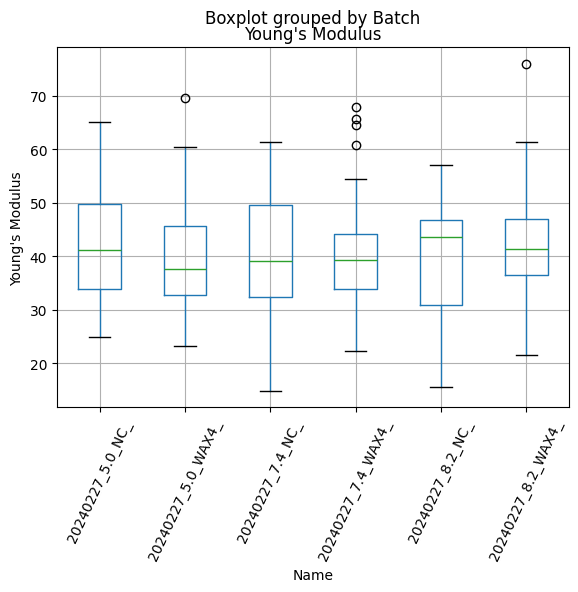

In [15]:
def do_plot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=TYPE, by='Batch')
    plt.xlabel('Name')
    plt.ylabel(TYPE)
    plt.xticks(rotation=65)
    ## y axis from 20 to 90
    #plt.ylim(15, 90)
    plt.show()
    

do_plot(df)


In [16]:
std_by_batch_all = df.groupby('Batch')[TYPE].std()
print(std_by_batch_all)

Batch
20240227_5.0_NC_      10.152639
20240227_5.0_WAX4_    10.995453
20240227_7.4_NC_      11.288288
20240227_7.4_WAX4_    11.488703
20240227_8.2_NC_      10.680081
20240227_8.2_WAX4_    11.215018
Name: Young's Modulus, dtype: float64


In [17]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                    20240227_5.0_NC_  20240227_5.0_WAX4_  20240227_7.4_NC_  \
 20240227_5.0_NC_               1.000               0.352             0.558   
 20240227_5.0_WAX4_             0.352               1.000             0.743   
 20240227_7.4_NC_               0.558               0.743             1.000   
 20240227_7.4_WAX4_             0.404               0.866             0.769   
 20240227_8.2_NC_               0.284               0.858             0.681   
 20240227_8.2_WAX4_             0.744               0.451             0.854   
 
                     20240227_7.4_WAX4_  20240227_8.2_NC_  20240227_8.2_WAX4_  
 20240227_5.0_NC_                 0.404             0.284               0.744  
 20240227_5.0_WAX4_               0.866             0.858               0.451  
 20240227_7.4_NC_                 0.769             0.681               0.854  
 20240227_7.4_WAX4_               1.000             0.621               0.397  
 20240227_8.2_NC_                 0.621      

In [18]:
unique_values = df['Note'].unique()
print(unique_values)

['ok' 'almost breakend' 'early-weakness' 'breakend' 'ok ' 'ok early'
 'early breakend' 'early-breakend']


let's remove all but ok

In [19]:
len(df)

213

In [20]:
count_by_batch = df['Batch'].value_counts()
print(count_by_batch)

Batch
20240227_7.4_NC_      37
20240227_8.2_NC_      37
20240227_8.2_WAX4_    37
20240227_5.0_NC_      35
20240227_5.0_WAX4_    34
20240227_7.4_WAX4_    33
Name: count, dtype: int64


In [21]:
df = df[df['Note'].isin(['ok', 'ok!', 'okkk', 'OK', 'good', 'great', 'ok '])]
len(df)

176

In [22]:
count_by_batch = df['Batch'].value_counts()
print(count_by_batch)

Batch
20240227_8.2_NC_      35
20240227_5.0_NC_      32
20240227_7.4_NC_      30
20240227_5.0_WAX4_    27
20240227_7.4_WAX4_    26
20240227_8.2_WAX4_    26
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

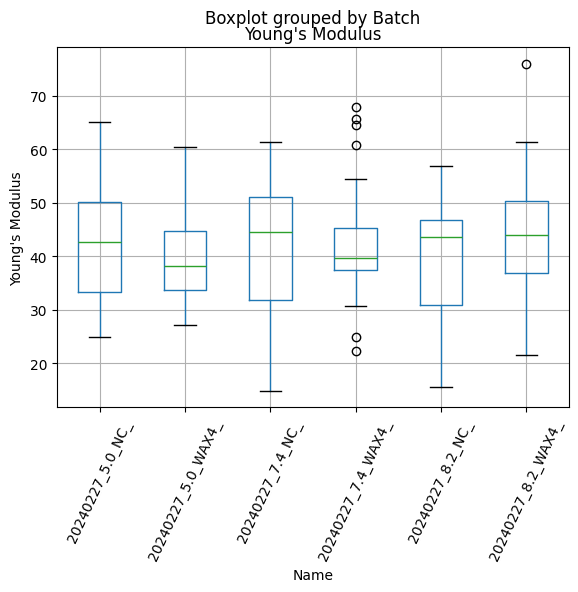

In [23]:
do_plot(df)

In [24]:
std_by_batch_ok = df.groupby('Batch')[TYPE].std()
print(std_by_batch_ok)

Batch
20240227_5.0_NC_      10.454084
20240227_5.0_WAX4_     9.135663
20240227_7.4_NC_      11.991555
20240227_7.4_WAX4_    11.771231
20240227_8.2_NC_      10.546822
20240227_8.2_WAX4_    12.320245
Name: Young's Modulus, dtype: float64


In [25]:
merged_df = pd.concat([std_by_batch_all, std_by_batch_ok], axis=1)
merged_df.columns = ['std all', 'std ok']
merged_df

,std all,std ok
Batch,,
20240227_5.0_NC_,10.152639,10.454084
20240227_5.0_WAX4_,10.995453,9.135663
20240227_7.4_NC_,11.288288,11.991555
20240227_7.4_WAX4_,11.488703,11.771231
20240227_8.2_NC_,10.680081,10.546822
20240227_8.2_WAX4_,11.215018,12.320245


In [26]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                    20240227_5.0_NC_  20240227_5.0_WAX4_  20240227_7.4_NC_  \
 20240227_5.0_NC_               1.000               0.470             0.894   
 20240227_5.0_WAX4_             0.470               1.000             0.497   
 20240227_7.4_NC_               0.894               0.497             1.000   
 20240227_7.4_WAX4_             0.845               0.551             0.824   
 20240227_8.2_NC_               0.221               0.932             0.374   
 20240227_8.2_WAX4_             0.845               0.251             0.749   
 
                     20240227_7.4_WAX4_  20240227_8.2_NC_  20240227_8.2_WAX4_  
 20240227_5.0_NC_                 0.845             0.221               0.845  
 20240227_5.0_WAX4_               0.551             0.932               0.251  
 20240227_7.4_NC_                 0.824             0.374               0.749  
 20240227_7.4_WAX4_               1.000             0.994               0.355  
 20240227_8.2_NC_                 0.994      

more check

In [27]:
bio = df.groupby('Batch')[TYPE].mean()
print(bio)

Batch
20240227_5.0_NC_      42.825437
20240227_5.0_WAX4_    40.440074
20240227_7.4_NC_      41.854533
20240227_7.4_WAX4_    42.366385
20240227_8.2_NC_      39.695943
20240227_8.2_WAX4_    43.761000
Name: Young's Modulus, dtype: float64


In [28]:
bio = df.groupby('Batch')[TYPE].median()
print(bio)

Batch
20240227_5.0_NC_      42.6870
20240227_5.0_WAX4_    38.1600
20240227_7.4_NC_      44.4800
20240227_7.4_WAX4_    39.6915
20240227_8.2_NC_      43.7040
20240227_8.2_WAX4_    43.9125
Name: Young's Modulus, dtype: float64
